In [1]:
import sys
sys.path.append("/home/evlasova/mirpy")

In [2]:
import pandas as pd

In [3]:
import os

os.chdir('../')

In [4]:
from mir.common.parser import *
from mir.common.repertoire import Repertoire
from mir.common.repertoire_dataset import RepertoireDataset
from mir.common.clonotype_dataset import ClonotypeDataset
from mir.basic.segment_usage import *
from mir.basic.sampling import RepertoireSampling
from mir.biomarkers.fisher_biomarkers_detector import FisherBiomarkersDetector
from mir.comparative.pair_matcher import ClonotypeRepresentation
from mir.basic.pgen import OlgaModel
import time

/home/evlasova/.conda/envs/bio2025/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
metadata_beta = pd.read_csv('data/desc_fmba_new_split_beta.csv').drop(columns=['Unnamed: 0']).dropna()

In [6]:
metadata_beta

,run,COVID_status,covid,folder,is_test_run
0,050002290808_S117_L002,COVID,covid,#2,False
1,050002630808_S113_L002,COVID,covid,#2,False
2,050003120808_S112_L002,COVID,covid,#2,False
3,050003130808_S114_L002,COVID,covid,#2,False
4,050003450808_S118_L002,COVID,covid,#2,False
...,...,...,...,...,...
1220,p18_72_DNA_S88_L002,COVID,covid,#9,False
1221,p18_73_DNA_S89_L002,COVID,covid,#9,False
1222,p18_74_DNA_S90_L002,COVID,covid,#9,False
1223,p18_75_DNA_S91_L002,COVID,covid,#9,False


In [7]:
metadata_alpha = pd.read_csv('data/desc_fmba_new_split_alpha.csv').drop(
    columns=['Unnamed: 0']).dropna().reset_index(drop=True)
metadata_alpha

,run,COVID_status,covid,folder,is_test_run
0,050002290808_S117_L002,COVID,covid,#2,False
1,050002630808_S113_L002,COVID,covid,#2,False
2,050003120808_S112_L002,COVID,covid,#2,False
3,050003130808_S114_L002,COVID,covid,#2,False
4,050003450808_S118_L002,COVID,covid,#2,False
...,...,...,...,...,...
1219,p18_72_DNA_S88_L002,COVID,covid,#9,False
1220,p18_73_DNA_S89_L002,COVID,covid,#9,False
1221,p18_74_DNA_S90_L002,COVID,covid,#9,False
1222,p18_75_DNA_S91_L002,COVID,covid,#9,False


In [8]:
markers = pd.read_csv('figures/covid_clonotypes.csv')
markers

,cdr3,cluster,has_covid_association,chain,v,j
0,CASAPGGSYEQYF,0,False,beta,TRBV12-5/TRBV7-9/TRBV28,TRBJ2-7
1,CASIPGGSYEQYF,0,False,beta,TRBV6-5,TRBJ2-7
2,CASKPGGSYEQYF,0,False,beta,TRBV5-4/TRBV25-1/TRBV6-5,TRBJ2-7
3,CASLPGGSYEQYF,0,False,beta,TRBV28,TRBJ2-7
4,CASNPGGSYEQYF,0,False,beta,TRBV28,TRBJ2-7
...,...,...,...,...,...,...
4955,CVVSDLMEYGNKLVF,111,False,alpha,TRAV8-2,TRAJ47
4956,CVVSDRMEYGNKLVF,111,False,alpha,TRAV8-2,TRAJ47
4957,CVVSEPSGGYQKVTF,112,False,alpha,TRAV8-2/TRAV10,TRAJ13
4958,CVVSGYGAAGNKLTF,113,False,alpha,TRAV8-2/TRAV10,TRAJ17


In [9]:
beta_markers = markers[markers.chain == 'beta']
alpha_markers = markers[markers.chain == 'alpha']

In [10]:
beta_markers

,cdr3,cluster,has_covid_association,chain,v,j
0,CASAPGGSYEQYF,0,False,beta,TRBV12-5/TRBV7-9/TRBV28,TRBJ2-7
1,CASIPGGSYEQYF,0,False,beta,TRBV6-5,TRBJ2-7
2,CASKPGGSYEQYF,0,False,beta,TRBV5-4/TRBV25-1/TRBV6-5,TRBJ2-7
3,CASLPGGSYEQYF,0,False,beta,TRBV28,TRBJ2-7
4,CASNPGGSYEQYF,0,False,beta,TRBV28,TRBJ2-7
...,...,...,...,...,...,...
562,CSAKSGHEQYF,55,False,beta,TRBV20-1,TRBJ2-7
563,CSASSGHEQYF,55,False,beta,TRBV20-1,TRBJ2-7
564,CSATSGHEQYF,55,False,beta,TRBV20-1,TRBJ2-7
565,CSASDRGYEQYF,56,False,beta,TRBV20-1,TRBJ2-7


In [11]:
alpha_markers

,cdr3,cluster,has_covid_association,chain,v,j
567,CAAADFNKFYF,0,True,alpha,TRAV13-1,TRAJ21
568,CAAANFNKFYF,0,True,alpha,TRAV23DV6,TRAJ21
569,CAADDFNKFYF,0,True,alpha,TRAV13-1,TRAJ21
570,CAAGDFNKFYF,0,True,alpha,TRAV13-1,TRAJ21
571,CAAHDFNKFYF,0,True,alpha,TRAV13-1,TRAJ21
...,...,...,...,...,...,...
4955,CVVSDLMEYGNKLVF,111,False,alpha,TRAV8-2,TRAJ47
4956,CVVSDRMEYGNKLVF,111,False,alpha,TRAV8-2,TRAJ47
4957,CVVSEPSGGYQKVTF,112,False,alpha,TRAV8-2/TRAV10,TRAJ13
4958,CVVSGYGAAGNKLTF,113,False,alpha,TRAV8-2/TRAV10,TRAJ17


In [12]:
beta_representations = [ClonotypeRepresentation(cdr3aa=x[1].cdr3, 
                                                             v=x[1].v, 
                                                             j=x[1].j) for x in beta_markers.iterrows()]

In [13]:
alpha_representations = [ClonotypeRepresentation(cdr3aa=x[1].cdr3, 
                                                             v=x[1].v, 
                                                             j=x[1].j) for x in alpha_markers.iterrows()]

In [14]:
t0 = time.time()
resampled_dataset_TRB = RepertoireDataset.load(parser=VDJtoolsParser(sep=','), 
                                 metadata=metadata_beta,
                                 threads=32,
                                 paths=[f'/projects/fmba_covid/publication/downsampled_fmba_TRB/{r["run"]}.clonotypes.TRB.txt' for _, r in metadata_beta.iterrows()])
print(time.time() - t0)

loading Repertoire objects: 100%|██████████| 1225/1225 [02:05<00:00,  9.80it/s]

125.73484182357788


In [15]:
t0 = time.time()
resampled_dataset_TRA = RepertoireDataset.load(parser=VDJtoolsParser(sep=','), 
                                 metadata=metadata_alpha,
                                 threads=32,
                                 paths=[f'/projects/fmba_covid/publication/downsampled_fmba_TRA/{r["run"]}.clonotypes.TRA.txt' for _, r in metadata_alpha.iterrows()])
print(time.time() - t0)

loading Repertoire objects: 100%|██████████| 1224/1224 [05:11<00:00,  3.93it/s]


317.59968161582947


In [16]:
t0 = time.time()
initial_dataset_TRB = RepertoireDataset.load(parser=VDJtoolsParser(sep=','), 
                                 metadata=metadata_beta,
                                 threads=32,
                                 paths=[f'/projects/fmba_covid/publication/fmba/{r["run"]}.clonotypes.TRB.txt' for _, r in metadata_beta.iterrows()])
print(time.time() - t0)

loading Repertoire objects: 100%|██████████| 1225/1225 [02:31<00:00,  8.08it/s]


162.74003338813782


In [17]:
t0 = time.time()
initial_dataset_TRA = RepertoireDataset.load(parser=VDJtoolsParser(sep=','), 
                                 metadata=metadata_alpha,
                                 threads=32,
                                 paths=[f'/projects/fmba_covid/publication/fmba/{r["run"]}.clonotypes.TRA.txt' for _, r in metadata_alpha.iterrows()])
print(time.time() - t0)

loading Repertoire objects: 100%|██████████| 1224/1224 [05:52<00:00,  3.47it/s]


365.24679231643677


In [18]:
for dtst in [initial_dataset_TRA, initial_dataset_TRB, resampled_dataset_TRA, resampled_dataset_TRB]:
    dtst.serialize_repertoires()

repertoire dataset serialization: 1224it [04:03,  5.03it/s]
repertoire dataset serialization: 1225it [02:01, 10.06it/s]
repertoire dataset serialization: 1224it [03:53,  5.25it/s]
repertoire dataset serialization: 1225it [02:14,  9.12it/s]


In [19]:
def get_clonotype_usages_for_dataset(dataset, representations):
    dataset.repertoire_matrix_public_clonotypes = representations
    dataset.threads = 12
    dataset.clonotype_usage_matrix
    usages = []
    for seq in representations:
        usages.append(dataset.clonotype_usage_matrix.get_clone_usage(seq))
    return usages

In [20]:
beta_usages_resampled = get_clonotype_usages_for_dataset(resampled_dataset_TRB, beta_representations)

clonotype usage matrix should be calculated. it would take a while
there are 567 public clonotypes
created MultipleRepertoireDenseMatcher
started with 12 threads
all in all 1225 reps, chunk size is 103, number of batches 12


clonotype usage matrix preparation: 100%|██████████| 12/12 [04:13<00:00, 21.12s/it]


In [21]:
beta_usages_initial = get_clonotype_usages_for_dataset(initial_dataset_TRB, beta_representations)

clonotype usage matrix should be calculated. it would take a while
there are 567 public clonotypes
created MultipleRepertoireDenseMatcher
started with 12 threads
all in all 1225 reps, chunk size is 103, number of batches 12


clonotype usage matrix preparation: 100%|██████████| 12/12 [04:15<00:00, 21.26s/it]


In [22]:
alpha_usages_resampled = get_clonotype_usages_for_dataset(resampled_dataset_TRA, alpha_representations)

clonotype usage matrix should be calculated. it would take a while
there are 4393 public clonotypes
created MultipleRepertoireDenseMatcher
started with 12 threads
all in all 1224 reps, chunk size is 102, number of batches 12


clonotype usage matrix preparation: 100%|██████████| 12/12 [06:01<00:00, 30.15s/it]


In [23]:
alpha_usages_initial = get_clonotype_usages_for_dataset(initial_dataset_TRA, alpha_representations)

clonotype usage matrix should be calculated. it would take a while
there are 4393 public clonotypes
created MultipleRepertoireDenseMatcher
started with 12 threads
all in all 1224 reps, chunk size is 102, number of batches 12


clonotype usage matrix preparation: 100%|██████████| 12/12 [06:09<00:00, 30.83s/it]


In [24]:
initial_dataset_TRA.clonotype_usage_matrix.clonotype_database_usage

<Compressed Sparse Column sparse array of dtype 'float64'
	with 1466134 stored elements and shape (1224, 4393)>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

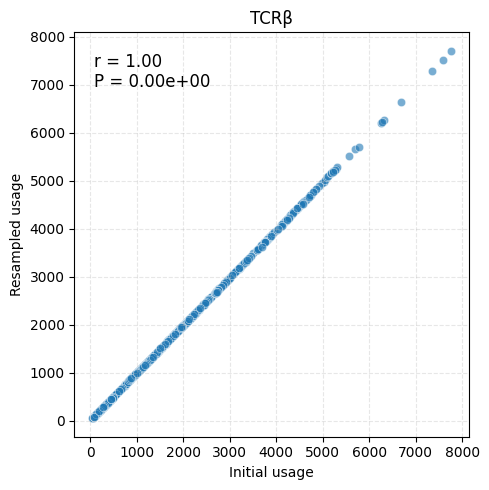

Correlation coefficient (r): 0.9999916683271979
P-value: 0.0


In [37]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=beta_usages_initial, y=beta_usages_resampled, alpha=0.6)
plt.title("TCRβ")
plt.xlabel("Initial usage")
plt.ylabel("Resampled usage")
plt.grid(True, linestyle='--', alpha=0.3)

# Calculate Pearson correlation coefficient and p-value
correlation_coeff, p_value = pearsonr(beta_usages_initial, beta_usages_resampled)

# Display correlation coefficient and p-value
plt.text(0.05, 0.95, f"r = {correlation_coeff:.2f}\nP = {p_value:.2e}",
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show plot
plt.tight_layout()
plt.savefig('beta_usage_init_vs_resampled.svg')
plt.show()

# Print correlation results to console
print(f"Correlation coefficient (r): {correlation_coeff}")
print(f"P-value: {p_value}")


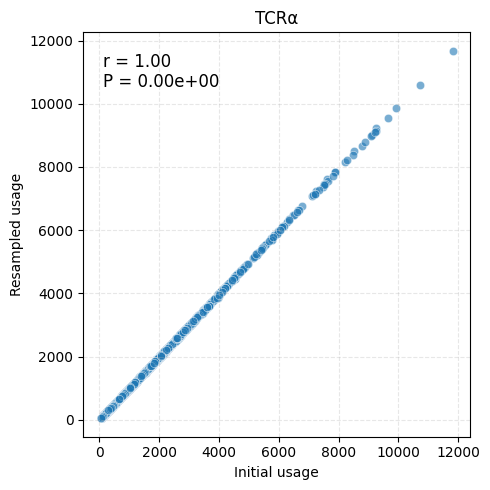

Correlation coefficient (r): 0.9999585453551638
P-value: 0.0


In [38]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=alpha_usages_initial, y=alpha_usages_resampled, alpha=0.6)
plt.title("TCRα")
plt.xlabel("Initial usage")
plt.ylabel("Resampled usage")
plt.grid(True, linestyle='--', alpha=0.3)

# Calculate Pearson correlation coefficient and p-value
correlation_coeff, p_value = pearsonr(alpha_usages_initial, alpha_usages_resampled)

# Display correlation coefficient and p-value
plt.text(0.05, 0.95, f"r = {correlation_coeff:.2f}\nP = {p_value:.2e}",
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show plot
plt.tight_layout()
plt.savefig('alpha_usage_init_vs_resampled.svg')
plt.show()

# Print correlation results to console
print(f"Correlation coefficient (r): {correlation_coeff}")
print(f"P-value: {p_value}")


In [28]:
initial_dataset_TRB.clonotype_usage_matrix.clonotype_database_usage

<Compressed Sparse Column sparse array of dtype 'float64'
	with 430971 stored elements and shape (1225, 567)>